# Problem1 Entropy

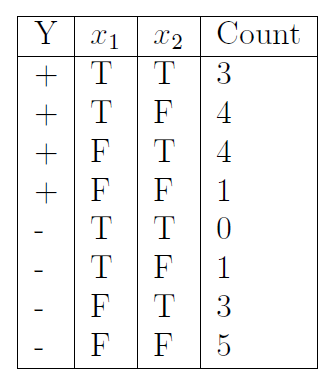

1)
What is the sample entropy, H(Y ) from this training data

In [1]:
import math

In [29]:
y_total=3+4+4+1+1+3+5
y_p=3+4+4+1
y_n=1+3+5

In [28]:
H_y=-(y_p/y_total*math.log2(y_p/y_total)+y_n/y_total*math.log2(y_n/y_total))
print(H_y)

0.9852281360342516


1) What are the information gains for branching on variables x1 and x2

In [41]:
x1_T_count=3+4+1

x1_F_count=4+1+3+5

In [47]:
cond_entro_x1=-(x1_T_count/y_total*(7/x1_T_count*math.log2(7/x1_T_count)+1/x1_T_count*math.log2(1/x1_T_count))+x1_F_count/y_total*(5/x1_F_count*math.log2(5/x1_F_count)+8/x1_F_count*math.log2(8/x1_F_count)))
print(cond_entro_x1)

0.7755671844068439


In [48]:
ig_x1=H_y-cond_entro_x1

In [45]:
x2_T_count=3+4+3
x2_F_count=4+1+1+5

In [49]:
cond_entro_x2=-(x2_T_count/y_total*(7/x2_T_count*math.log2(7/x2_T_count)+3/x2_T_count*math.log2(3/x2_T_count))+x2_F_count/y_total*(5/x2_F_count*math.log2(5/x2_F_count)+6/x2_F_count*math.log2(6/x2_F_count)))
print(cond_entro_x2)

0.9403448246930214


In [50]:
ig_x2=H_y-cond_entro_x2

In [51]:
ig_x1

0.20966095162740772

In [52]:
ig_x2

0.04488331134123025

3) Draw the deicion tree that would be learned by the ID3 algorithm without pruning from
this training data

# Problem 2

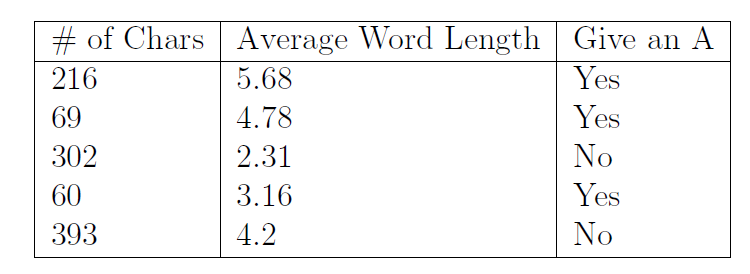

(a) What are the class priors, P(A = Y es); P(A = No)?

In [53]:
P_yes=3/5
P_no=2/5

(b) Find the parameters of the Gaussians necessary to do **Gaussian Naive Bayes classication**
on this decision to give an A or not. Standardize the features first over all the data together
so that there is no unfair bias towards the features of different scales

In [102]:
import pandas as pd
import numpy as np

In [87]:
features={}
features['char_num']=[216,69,302,60,393]
features['word_len']=[5.68,4.78,2.31,3.16,4.2]

In [88]:
df_raw=pd.DataFrame(features)

In [89]:
df=(df_raw-df_raw.mean(axis=0))/df_raw.std(axis=0)

In [100]:
df

,char_num,word_len
0,0.055091,1.247714
1,-0.957199,0.568789
2,0.647314,-1.294484
3,-1.019176,-0.653277
4,1.273970,0.131259


In [98]:
inx_A=[0,1,3]
x1_A=df.iloc[inx_A,0]
x2_A=df.iloc[inx_A,1]
x1_A_mean=x1_A.mean()
x1_A_std=x1_A.std()
x2_A_mean=x2_A.mean()
x2_A_std=x2_A.std()

In [99]:
inx_B=[2,4]
x1_B=df.iloc[inx_B,0]
x2_B=df.iloc[inx_B,1]
x1_B_mean=x1_B.mean()
x1_B_std=x1_B.std()
x2_B_mean=x2_B.mean()
x2_B_std=x2_B.std()

(c) Using your response from the prior question, determine if an essay with 242 characters
and an average word length of 4.56 should get an A or not (3pts).

In [92]:
test=pd.Series([242,4.56])

In [93]:
test_norm=(test.values-df_raw.mean(axis=0).values)/df_raw.std(axis=0).values

In [95]:
test_norm

array([0.23413502, 0.40282904])

In [103]:
def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

In [107]:
P_x1=gaussian(test_norm[0],x1_A_mean,x1_A_std)

In [108]:
P_x2=gaussian(test_norm[1],x2_A_mean,x2_A_std)

In [109]:
P_x1*P_x2

0.09571963457855148

In [113]:
P_x1=gaussian(test_norm[0],x1_B_mean,x1_B_std)

In [114]:
P_x2=gaussian(test_norm[1],x2_B_mean,x2_B_std)

In [115]:
P_x1*P_x2

0.05767722413078204